<a href="https://colab.research.google.com/github/HarivardhanR/DigitsClassifier-Keras/blob/master/DigitsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils.np_utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten 

from keras.layers.normalization import BatchNormalization

from sklearn.datasets import fetch_openml

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Dowloading the Dataset**

In [2]:
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y = mnist["data"],mnist["target"]
X.shape,y.shape

((70000, 784), (70000,))

**Plotting a digit and its corresponding label value**

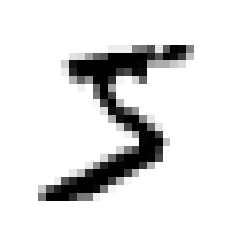

Real Number is 5


In [4]:
digit_1 = X[0]
digit_1 = digit_1.reshape(28,28)

plt.imshow(digit_1,cmap="binary")
plt.axis("off")

digit = y[0]

plt.show()
print(f"Real Number is {digit}")

**Normalization**

In [5]:
X = X / 255.0

**Reshaping 1D pixel values into 2D images**

In [6]:
X = X.reshape(-1,28,28,1)

**One-Hot Encoding**

In [7]:
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (70000, 10)


**Splitting the train and the test set for the fitting**

In [8]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

**Creating the model**

In [9]:
model=Sequential()
   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

**Plotting the CNN Model**

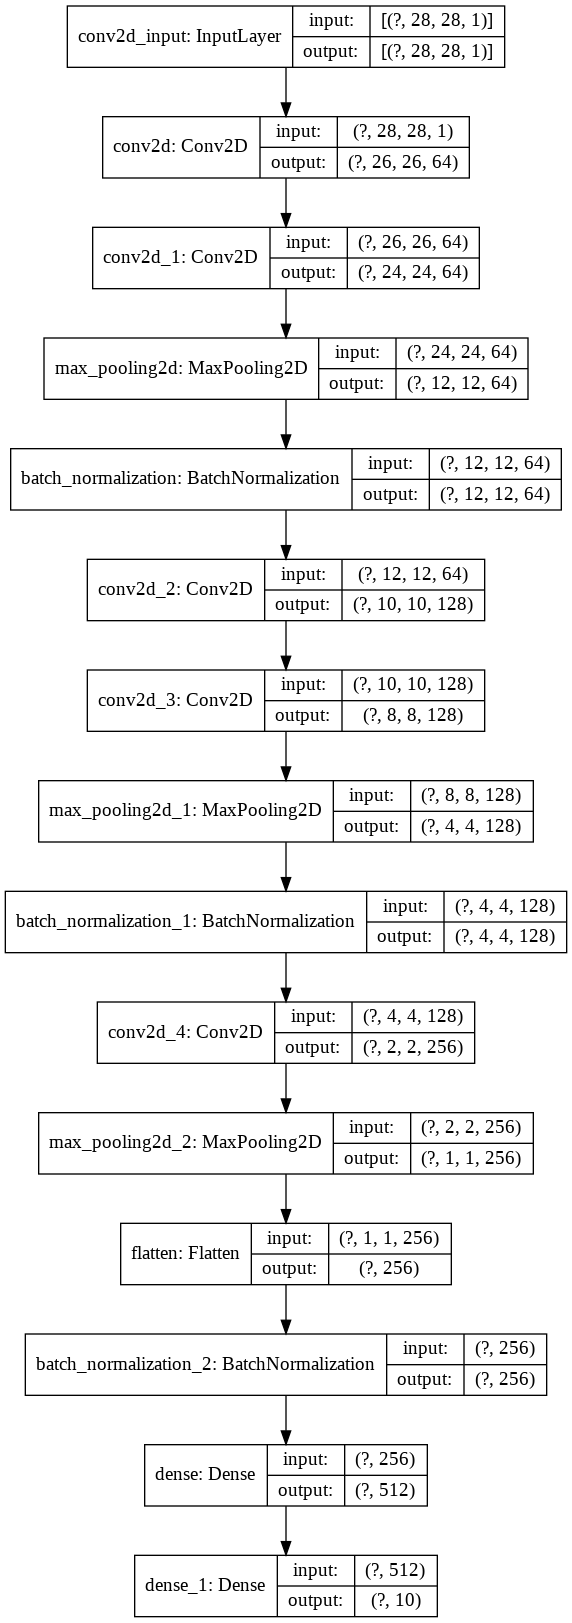

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

**data augmentation**

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

batch_size = 64
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

**Training the Model**

In [12]:
epochs = 20
history = model.fit(train_gen, 
                    epochs = epochs, 
                    steps_per_epoch = X_train.shape[0] // batch_size,
                    validation_data = test_gen,
                    validation_steps = X_test.shape[0] // batch_size)

Epoch 1/20
937/937 [==============================] - 451s 481ms/step - loss: 0.1266 - accuracy: 0.9604 - val_loss: 0.1006 - val_accuracy: 0.9696
Epoch 2/20
937/937 [==============================] - 449s 479ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0594 - val_accuracy: 0.9823
Epoch 3/20
937/937 [==============================] - 453s 484ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0430 - val_accuracy: 0.9866
Epoch 4/20
937/937 [==============================] - 449s 479ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0412 - val_accuracy: 0.9882
Epoch 5/20
937/937 [==============================] - 454s 485ms/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0486 - val_accuracy: 0.9848
Epoch 6/20
937/937 [==============================] - 448s 478ms/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 7/20
937/937 [==============================] - 451s 481ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0311 -

**Plotting Confusion Matrix**

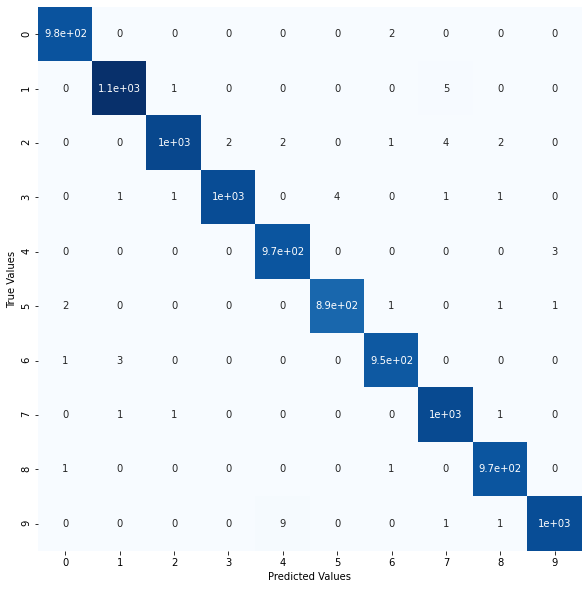

In [13]:
fig = plt.figure(figsize=(10, 10))

y_pred = model.predict(X_test)

Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1) 

mat = confusion_matrix(Y_test, Y_pred)

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

**Converting an existing Keras model to TF.js Layers format**

In [16]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, "./MNISTv99.53")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
